<a href="https://colab.research.google.com/github/abid-mugdho9875/titanic_simple/blob/main/image_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Small Image Classification Using Convolutional Neural Network (CNN)
n this notebook, we will classify small images cifar10 dataset from tensorflow keras datasets. There are total 10 classes as shown below. We will use both ANN & CNN for classification then we will  compare between two.

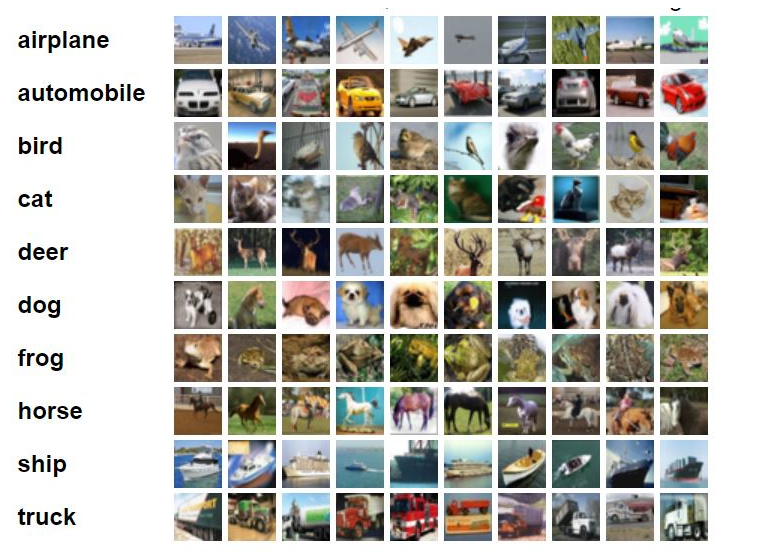


In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

## Load Dataset

In [2]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()
X_train.shape

170500096/170498071 [==============================] - 2s 0us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

Now we will convert this in 1d array.

In [6]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [8]:
def sample_truck(X,y,index):
  plt.figure(figsize=(8,5))
  plt.imshow(X[index])
  plt.xlabel(classes[y_train[index]])

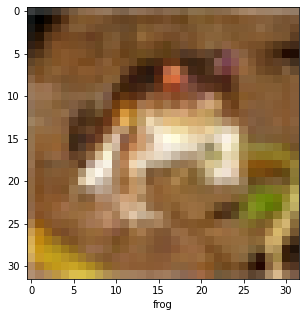

In [9]:
sample_truck(X_train,y_train,0)

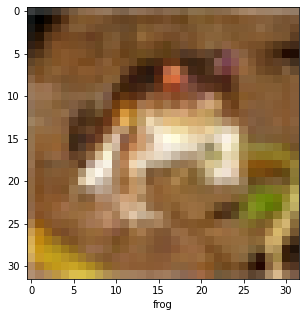

In [10]:
sample_truck(X_train,y_train,0)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255
## Normalize value

In [11]:
X_train=X_train/255.0
X_test=X_test/255.0

In [12]:
X_train[:5]

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

## Build simple artificial neural network for image classification

In [13]:
ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')                
  ])
ann.compile(
    optimizer='SGD',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']    
)
ann.fit(X_train,y_train,epochs=7)

Epoch 1/7
1563/1563 [==============================] - 6s 3ms/step - loss: 1.9260 - accuracy: 0.3019
Epoch 2/7
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6431 - accuracy: 0.4215
Epoch 3/7
1563/1563 [==============================] - 4s 3ms/step - loss: 1.5431 - accuracy: 0.4556
Epoch 4/7
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4920 - accuracy: 0.4764
Epoch 5/7
1563/1563 [==============================] - 4s 3ms/step - loss: 1.4298 - accuracy: 0.4986
Epoch 6/7
1563/1563 [==============================] - 4s 3ms/step - loss: 1.3838 - accuracy: 0.5151
Epoch 7/7
1563/1563 [==============================] - 4s 3ms/step - loss: 1.3547 - accuracy: 0.5260


After 7 epochs we find only 52.60%.Thats give a very poor result.

In [19]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred=ann.predict(X_test)
y_pred_class=[np.argmax(element) for element in y_pred]
print("Classification Report:\n",classification_report(y_test,y_pred_class))

Classification Report:
               precision    recall  f1-score   support

           0       0.41      0.74      0.53      1000
           1       0.62      0.63      0.62      1000
           2       0.36      0.45      0.40      1000
           3       0.42      0.21      0.28      1000
           4       0.55      0.27      0.36      1000
           5       0.43      0.37      0.40      1000
           6       0.57      0.52      0.55      1000
           7       0.49      0.62      0.55      1000
           8       0.66      0.55      0.60      1000
           9       0.57      0.59      0.58      1000

    accuracy                           0.50     10000
   macro avg       0.51      0.50      0.49     10000
weighted avg       0.51      0.50      0.49     10000




## Now let us build a convolutional neural network to train our images

In [21]:
cnn=models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

In [23]:
cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']    
)

In [24]:
cnn.fit(X_train,y_train,epochs=7)

Epoch 1/7
1563/1563 [==============================] - 10s 3ms/step - loss: 1.6783 - accuracy: 0.3864
Epoch 2/7
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1370 - accuracy: 0.6017
Epoch 3/7
1563/1563 [==============================] - 4s 3ms/step - loss: 0.9940 - accuracy: 0.6561
Epoch 4/7
1563/1563 [==============================] - 4s 3ms/step - loss: 0.9032 - accuracy: 0.6854
Epoch 5/7
1563/1563 [==============================] - 4s 3ms/step - loss: 0.8328 - accuracy: 0.7112
Epoch 6/7
1563/1563 [==============================] - 4s 3ms/step - loss: 0.7562 - accuracy: 0.7377
Epoch 7/7
1563/1563 [==============================] - 4s 3ms/step - loss: 0.7247 - accuracy: 0.7465


In Cnn we get 74.65% after 7 epochs.Which is higher than Ann.

In [26]:

cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.8722 - accuracy: 0.7039


[0.872168242931366, 0.7038999795913696]

In [27]:

y_pred=cnn.predict(X_test)
y_pred_class=[np.argmax(element) for element in y_pred]
print("Classification Report:\n",classification_report(y_test,y_pred_class))

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.77      0.74      1000
           1       0.82      0.82      0.82      1000
           2       0.60      0.59      0.60      1000
           3       0.56      0.44      0.50      1000
           4       0.67      0.62      0.64      1000
           5       0.53      0.72      0.61      1000
           6       0.79      0.76      0.77      1000
           7       0.77      0.74      0.75      1000
           8       0.87      0.74      0.80      1000
           9       0.76      0.83      0.79      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000



After complete our analysis we decide that CNN is better than ANN for image classification.